In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=100,centers=2,random_state=0)

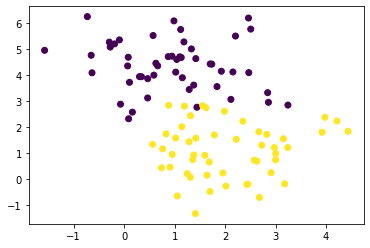

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)

In [54]:
point=np.array([2,2])

In [55]:
arr=np.sum((x-point)**2,axis=1)

In [56]:
#arr

In [57]:
arr.argsort()[:5]

array([14, 29, 45, 37, 77], dtype=int64)

In [58]:
nearest=x[arr.argsort()[:5]]

In [59]:
x[:5]

array([[ 4.21850347,  2.23419161],
       [ 0.90779887,  0.45984362],
       [-0.27652528,  5.08127768],
       [ 0.08848433,  2.32299086],
       [ 3.24329731,  1.21460627]])

In [60]:
nearest ### check the index value of x whi

array([[1.78726415, 1.70012006],
       [2.3535057 , 2.22404956],
       [2.22194102, 1.5326951 ],
       [1.98702592, 2.61100638],
       [2.66934689, 1.81987033]])

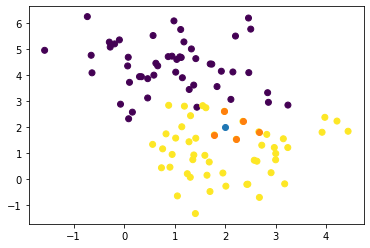

In [61]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(point[0],point[1])
plt.scatter(nearest[:,0],nearest[:,1])

In [86]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier

In [87]:
 x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [88]:
model=KNeighborsClassifier()

In [89]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
model.predict(x_test[:10])

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [91]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [92]:
model.score(x_test,y_test)

0.9696969696969697

In [128]:
class KNNCustom:
    
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict_point(self, point):
        
        distances = np.sum((self.x - point)**2, axis=1)
        nearest = self.y[distances.argsort()[:self.n_neighbors]]
        
        items, counts = np.unique(nearest, return_counts=True)
        
        return items[counts.argmax()]
    
    
    def predict(self, x):
        
        result = []
        
        for point in x:
            result.append(self.predict_point(point))
        
        return np.array(result)
    
    def score(self,x,y):
        result=[]
        yp=self.predict(x)
        return (yp==y).mean()

In [129]:
model=KNNCustom()

In [130]:
model.fit(x,y)

In [131]:
a=np.array([2,2])

In [132]:
model.predict_point(a)

1

In [133]:
model.predict(x[:10])

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [134]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [135]:
model.score(x,y)

0.99

In [110]:
acc=[]
Knegi=40
for i in range(1,40):
    model=KNNCustom(n_neighbors=i)
    model.fit(x_train,y_train)
    point=np.array([2,2])
    model.predict_point(point)
    acc.append(model.score(x_test,y_test))

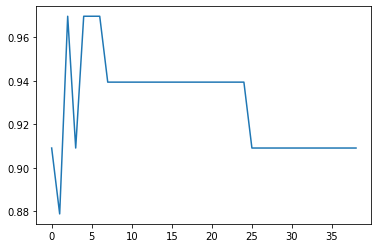

In [111]:
plt.plot(acc)